In [58]:
# Neccesary Packages
from __future__ import division
import matplotlib.pyplot as plt
import numpy.matlib as matlib
from scipy.stats import multivariate_normal
import numpy as np
import support_code
import math

In [2]:
np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
dataSize = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = support_code.generateData(dataSize, noise, actual_weights)

#Question (b)
sigmas_to_test = [1/2, 1/(2**5), 1/(2**10)]

In [41]:
#Scipy normal distribution kit
means = xtrain.dot(actual_weights).T.tolist()[0]
cov = np.identity(dataSize)*noise['var']

In [42]:
np.cumsum(np.log(multivariate_normal.pdf(cov=cov,mean=means,x=ytrain)))

array([  -93.2290793 ,  -159.54536776,  -222.95883327,  -268.17383132,
        -289.04086096,  -318.06089601,  -418.31210147,  -477.29705722,
        -516.81050215,  -533.12215599,  -575.01589841,  -605.6369325 ,
        -633.48406789,  -737.49676727,  -843.98661265,  -873.8779717 ,
        -974.49781966, -1015.914932  , -1080.59181142, -1169.04932448,
       -1210.52597133, -1249.30444511, -1283.34126897, -1414.09292614,
       -1539.98271883, -1558.42482468, -1629.74368828, -1749.91958956,
       -1813.35725053, -1853.53050833, -1956.24132394, -1971.13405742,
       -1985.85071579, -2029.77295938, -2114.32442027, -2207.80105045,
       -2239.27633189, -2387.05954859, -2440.94272645, -2506.85500719])

In [117]:
x = xtrain
y_train = ytrain
W = actual_weights

In [121]:
x = np.array(x)

W = np.array(W).reshape(-1)
y_train = np.array(ytrain).reshape(-1)

In [129]:
x.dot(W.reshape(-1,1))

array([[-0.09493446],
       [ 0.03048668],
       [ 0.61369789],
       [ 0.0253043 ],
       [ 0.26492588],
       [ 0.49510193],
       [ 0.70259813],
       [ 0.09278643],
       [ 0.48010719],
       [ 0.17552725],
       [ 0.55854354],
       [ 0.46438065],
       [ 0.12821904],
       [ 0.71157451],
       [-0.00409376],
       [ 0.15909212],
       [-0.08074866],
       [ 0.57507084],
       [ 0.55703652],
       [-0.07618779],
       [ 0.56785873],
       [ 0.51650235],
       [ 0.47779816],
       [-0.16684658],
       [-0.15817358],
       [ 0.37000036],
       [ 0.5677026 ],
       [-0.09619423],
       [ 0.63913634],
       [ 0.15753923],
       [-0.06543911],
       [ 0.36228462],
       [ 0.33565997],
       [ 0.1065698 ],
       [ 0.74698168],
       [ 0.65901988],
       [ 0.52435317],
       [ 0.76080732],
       [ 0.04626296],
       [ 0.60599467]])

In [132]:
def likelihoodFunc(W, x, y_train, likelihood_var):
    '''
    Implement likelihoodFunc. This function returns the data likelihood
    given f(y_train | x; W) ~ Normal(w^Tx, likelihood_var).

    Args:
        W: Weights
        x: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''
    x = np.array(x)
    W = np.array(W).reshape(-1)
    y_train = np.array(ytrain)
    dataSize = x.shape[0]
    means = x.dot(W)
    print(means)
    pdf = multivariate_normal.pdf(cov=likelihood_var,mean=means,x=y_train)
    likelihood = np.cumprod(pdf)[-1]
    return pdf

In [135]:
def likelihoodFunc(W, x, y_train, likelihood_var):
    '''
    Implement likelihoodFunc. This function returns the data likelihood
    given f(y_train | x; W) ~ Normal(w^Tx, likelihood_var).

    Args:
        W: Weights
        x: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        likelihood_var: likelihood variance

    Returns:
        likelihood: Data likelihood (float)
    '''
    likelihood = 1
    for i in range(len(x)):
        mu = np.dot(W.T, x[i, :].T)
        likelihood *= 1 / np.sqrt(2 * math.pi * likelihood_var) * np.exp((-(y_train[i] - mu) ** 2 / (2 * likelihood_var)))
    return likelihood

In [61]:
def getPosteriorParams(x, y_train, prior, likelihood_var = 0.2**2):
    '''
    Implement getPosterioParams. This function returns the posterior
    mean vector \mu_p and posterior covariance matrix \Sigma_p for
    Bayesian regression (normal likelihood and prior).

    Note support_code.make_plots takes this completed function as an argument.

    Args:
        x: Training design matrix with first col all ones (np.matrix)
        y_train: Training response vector (np.matrix)
        prior: Prior parameters; dict with 'mean' (prior mean np.matrix)
               and 'var' (prior covariance np.matrix)
        likelihood_var: likelihood variance- default (0.2**2) per the lecture slides

    Returns:
        postMean: Posterior mean (np.matrix)
        postVar: Posterior mean (np.matrix)
    '''
    # This infact assume prior mean are all zero
    wdim = x.shape[1]
    postMean = (np.dot(x.T,x)+likelihood_var**2*prior['var'].getI()).getI().dot(x.T).dot(y_train)
    postVar = (likelihood_var**(-2)*np.dot(x.T,x)+prior['var'].getI()).getI()
    #postMean.resize(wdim)
    return postMean, postVar

In [8]:
sigma_squared=0.5
prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

In [9]:
postMean,postVar = getPosteriorParams(xtrain,ytrain,prior = prior)

In [10]:
postMean.reshape(1,-1)

matrix([[ 0.30099128,  0.52696933]])

In [62]:
def getPredictiveParams(x_new, postMean, postVar, likelihood_var = 0.2**2):
    '''
    Implement getPredictiveParams. This function returns the predictive
    distribution parameters (mean and variance) given the posterior mean
    and covariance matrix (returned from getPosteriorParams) and the
    likelihood variance (default value from lecture).

    Args:
        x: New observation (np.matrix object)
        postMean, postVar: Returned from getPosteriorParams
        likelihood_var: likelihood variance (0.2**2) per the lecture slides

    Returns:
        - predMean: Mean of predictive distribution
        - predVar: Variance of predictive distribution
    '''

    # TO DO
    x_new = x_new.reshape(-1,1)
    predMean = np.dot(postMean.T,x_new)
    predVar = x_new.T.dot(postVar).dot(x_new)+likelihood_var**2
    return predMean, predVar

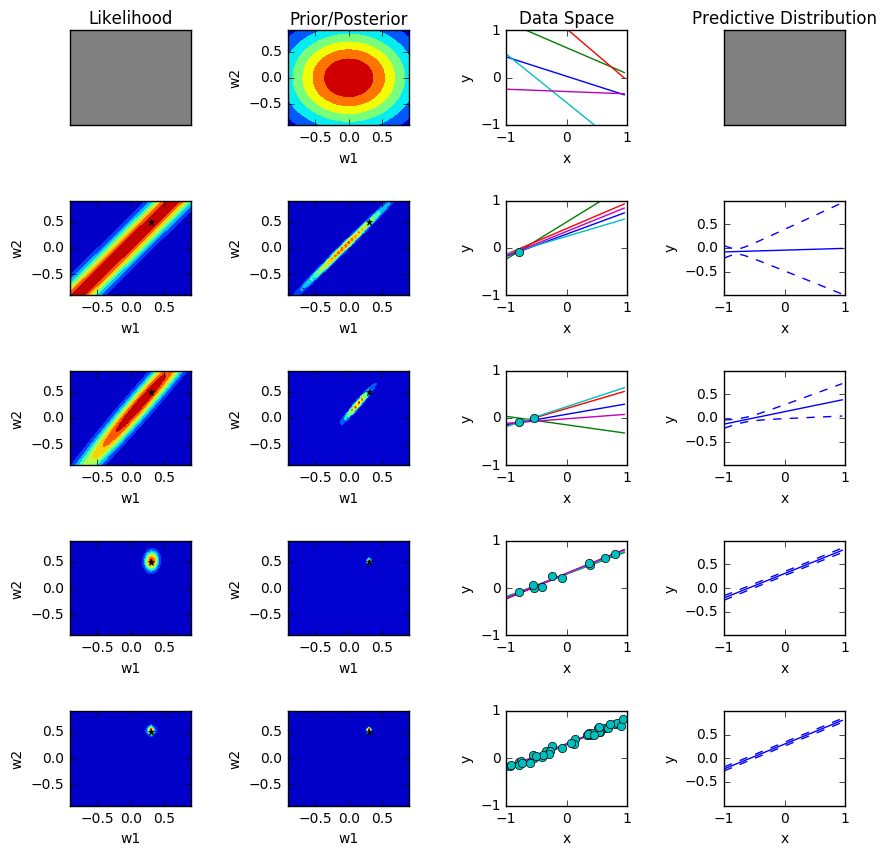

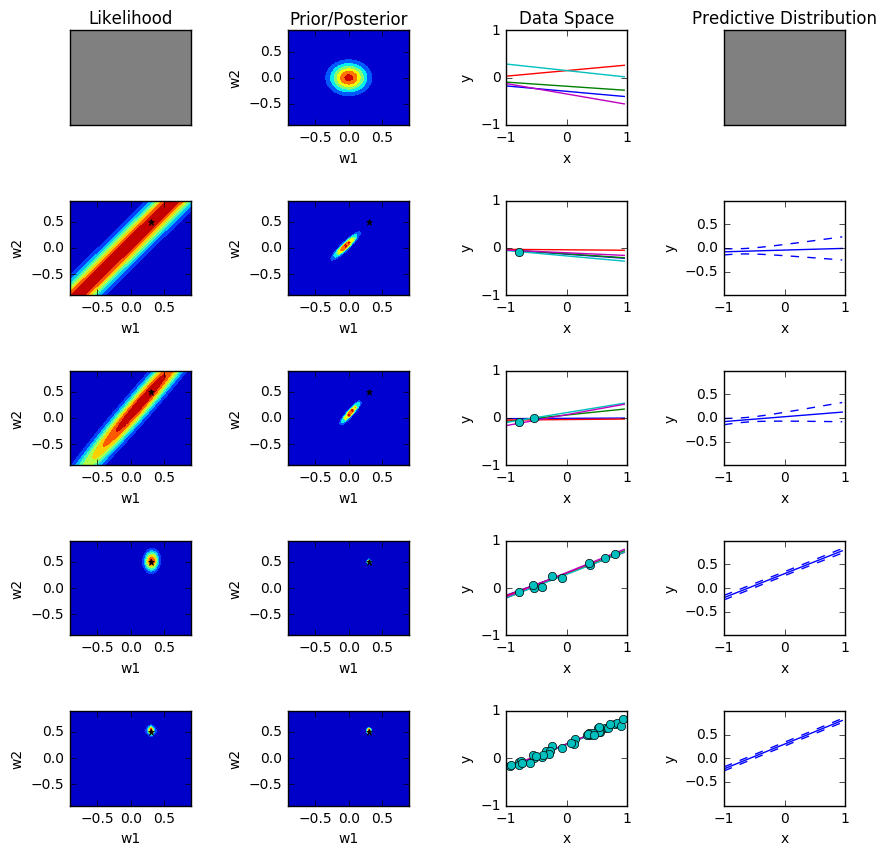

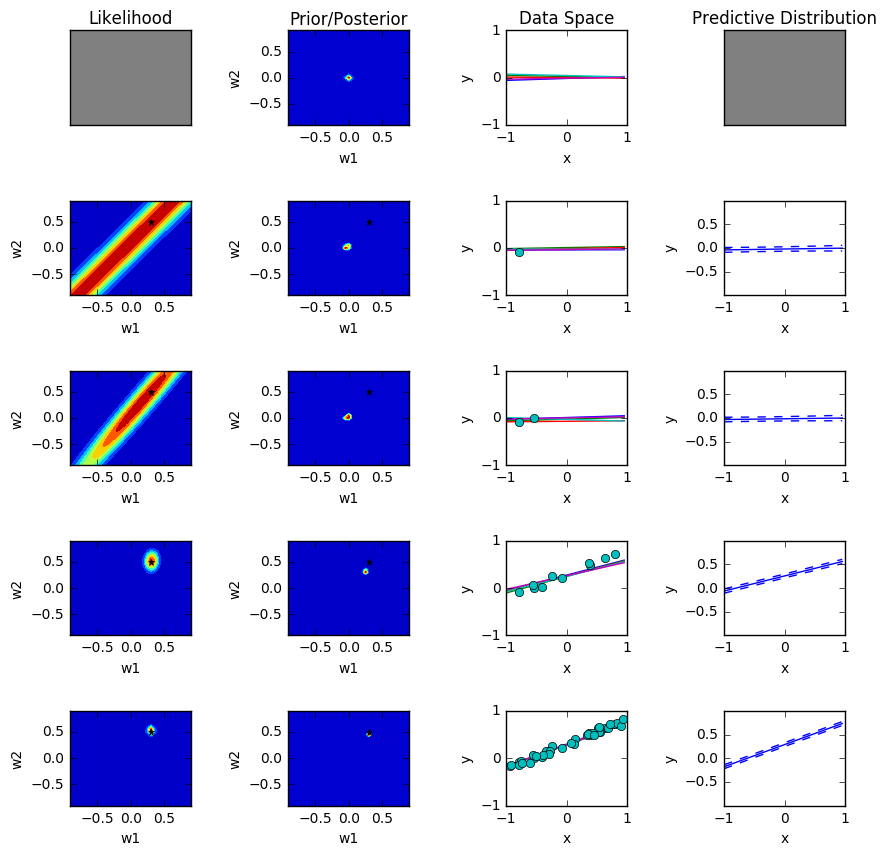

In [136]:
np.random.seed(46134)
actual_weights = np.matrix([[0.3], [0.5]])
dataSize = 40
noise = {"mean":0, "var":0.2 ** 2}
likelihood_var = noise["var"]
xtrain, ytrain = support_code.generateData(dataSize, noise, actual_weights)

#Question (b)
sigmas_to_test = [1/2, 1/(2**5), 1/(2**10)]
for sigma_squared in sigmas_to_test:
    prior = {"mean":np.matrix([[0], [0]]),
             "var":matlib.eye(2) * sigma_squared}

    support_code.make_plots(actual_weights,
                            xtrain,
                            ytrain,
                            likelihood_var,
                            prior,
                            likelihoodFunc,
                            getPosteriorParams,
                            getPredictiveParams)